# Dataset: Daily Delhi Climate Dataset
# Author: Madalin Marian Porojan

# 1. Dataset Visualization

## Load

In [413]:
import pandas as pd

df_test = pd.read_csv("a01_datasets/DailyDelhiClimateTest.csv", parse_dates=["date"], index_col="date")
df_train = pd.read_csv("a01_datasets/DailyDelhiClimateTrain.csv", parse_dates=["date"], index_col="date")

## Correct Typing 

In [414]:
df_test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [415]:
df_train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [416]:
import numpy as np

df_train["meantemp"] = df_train["meantemp"].mask((df_train["meantemp"] >= 60), np.nan) # remove negative/zero pressure values. They don't make sense in this context
df_train["wind_speed"] = df_train["wind_speed"].mask((df_train["wind_speed"] <= 0) | (df_train["wind_speed"] >= 486), np.nan) # remove negative/zero pressure values. They don't make sense in this context
df_train["humidity"] = df_train["humidity"].mask(df_train["humidity"] >= 100, np.nan) # remove negative/zero pressure values. They don't make sense in this context
df_train["meanpressure"] = df_train["meanpressure"].mask((df_train["meanpressure"] <= 870) | (df_train["meanpressure"] >= 1100), np.nan) # remove negative/zero pressure values. They don't make sense in this context

df_train = df_train.bfill().ffill()

## Plot Time Series Data

In [417]:
import matplotlib.pyplot as plt

def visualize_dataset(df):
    
    # Training data
    fig, axes = plt.subplots(4, 1, figsize=(15, 20))

    # Additive decomposition plots
    df_train["meantemp"][df_train.index.year == 2013].plot(ax=axes[0], linestyle='-', label="Mean Temperature", grid=True, legend=True, xlabel="Date", ylabel="Values")
    df_train["humidity"][df_train.index.year == 2013].plot(ax=axes[1], linestyle='-', label="Humidity", grid=True, legend=True, xlabel="Date", ylabel="Values")
    df_train["wind_speed"][df_train.index.year == 2013].plot(ax=axes[2], linestyle='-', label="Wind Speed", grid=True, legend=True, xlabel="Date", ylabel="Values")
    df_train["meanpressure"][df_train.index.year == 2016].plot(ax=axes[3], linestyle='-', label="Mean Pressure", grid=True, legend=True, xlabel="Date", ylabel="Values")
    
    plt.show()

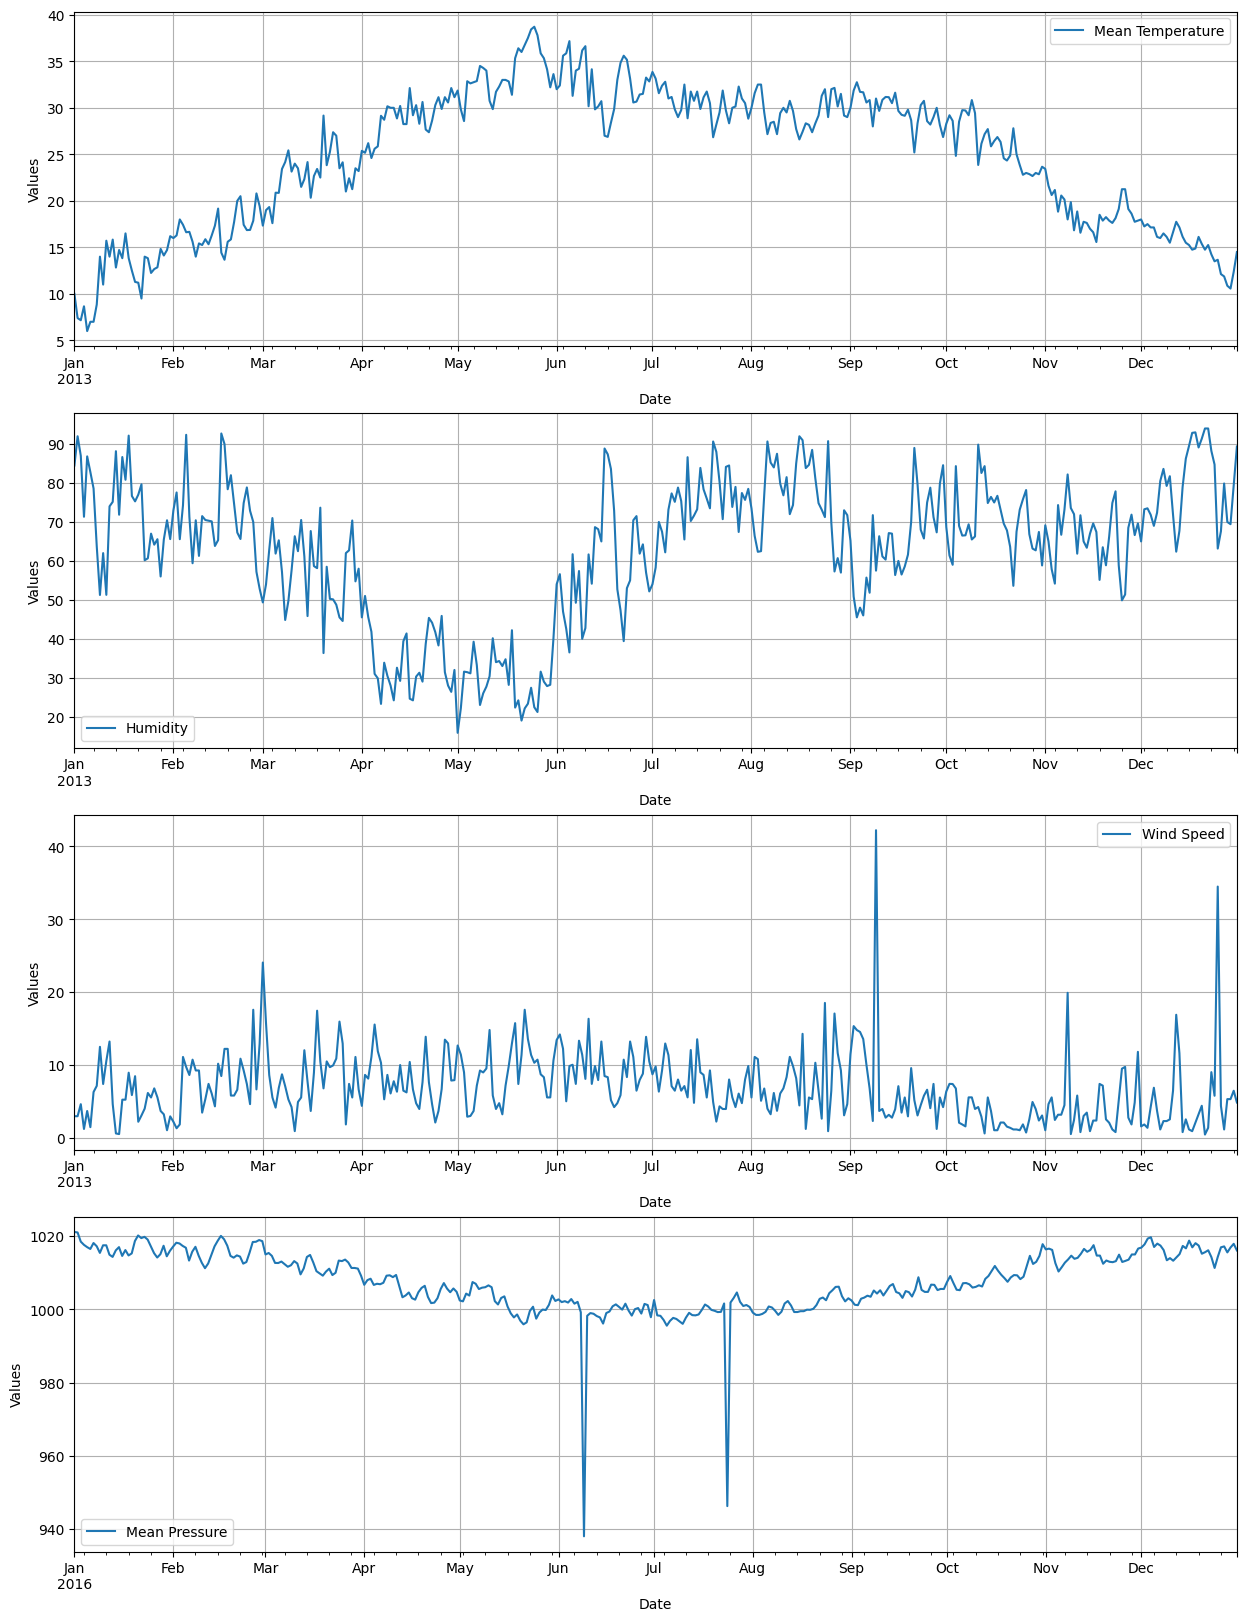

In [418]:
visualize_dataset(df_train)

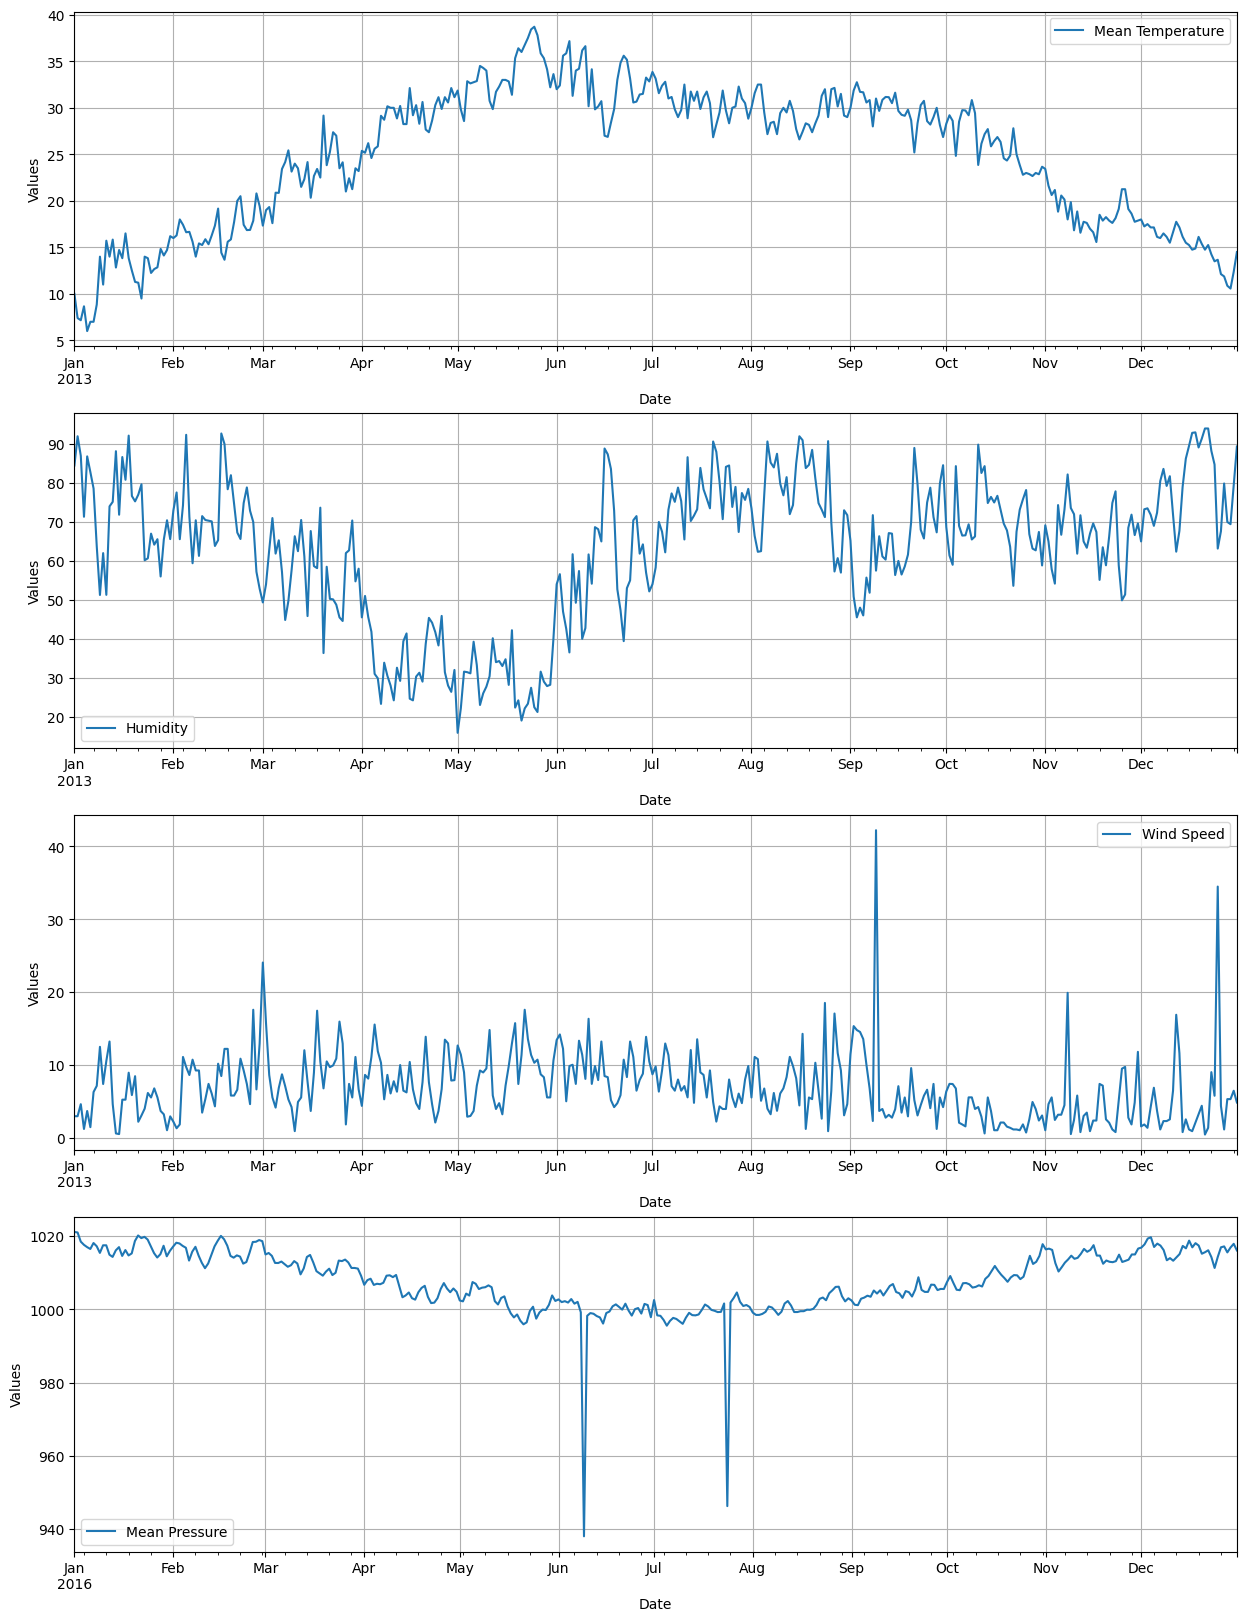

In [419]:
visualize_dataset(df_test)

# 2. Statistical Analysis

## Mean

In [420]:
df_train.mean()

meantemp          25.495521
humidity          60.762810
wind_speed         6.859648
meanpressure    1008.168505
dtype: float64

## Variance

In [421]:
df_train.var()

meantemp         53.994614
humidity        280.638724
wind_speed       20.343161
meanpressure     61.218046
dtype: float64

## Change over time of Mean and Variance 

In [422]:
yearly_stats = df_train['meantemp'].groupby(df_train.index.year).agg(['mean', 'var'])
print(yearly_stats)

           mean        var
date                      
2013  24.791494  54.896169
2014  25.010673  57.719487
2015  25.114591  52.385837
2016  27.103373  47.451002
2017  10.000000        NaN


In [423]:
yearly_stats = df_train['humidity'].groupby(df_train.index.year).agg(['mean', 'var'])
print(yearly_stats)

           mean         var
date                       
2013  63.046292  330.934231
2014  59.767942  263.117169
2015  61.430490  246.281105
2016  58.740174  272.655433
2017  87.000000         NaN


In [424]:
yearly_stats = df_train['wind_speed'].groupby(df_train.index.year).agg(['mean', 'var'])
print(yearly_stats)

          mean        var
date                     
2013  6.932006  22.523680
2014  6.818408  21.136125
2015  6.500295  21.909188
2016  7.185715  15.795749
2017  7.325000        NaN


In [425]:
yearly_stats = df_train['meanpressure'].groupby(df_train.index.year).agg(['mean', 'var'])
print(yearly_stats)

             mean        var
date                        
2013  1007.642172  60.141881
2014  1008.347166  58.416038
2015  1008.834821  55.166131
2016  1007.829333  70.755500
2017  1016.000000        NaN


In [426]:
def rolling_window(column: str):
    window_size = 90
    fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    df_train[column].rolling(window=window_size, min_periods=1).mean().plot(ax=ax[0])
    ax[0].set_title(f'{window_size}-Day Rolling Mean of {column}')
    df_train[column].rolling(window=window_size, min_periods=1).var().plot(ax=ax[1])
    ax[1].set_title(f'{window_size}-Day Rolling Variance of {column}')

    plt.tight_layout()
    plt.show()

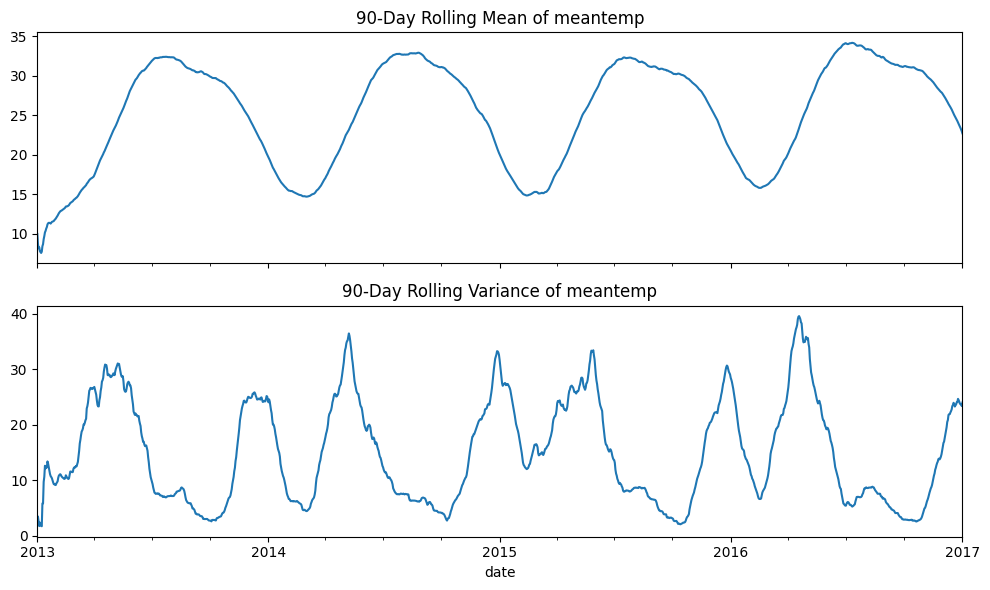

In [427]:
rolling_window("meantemp")

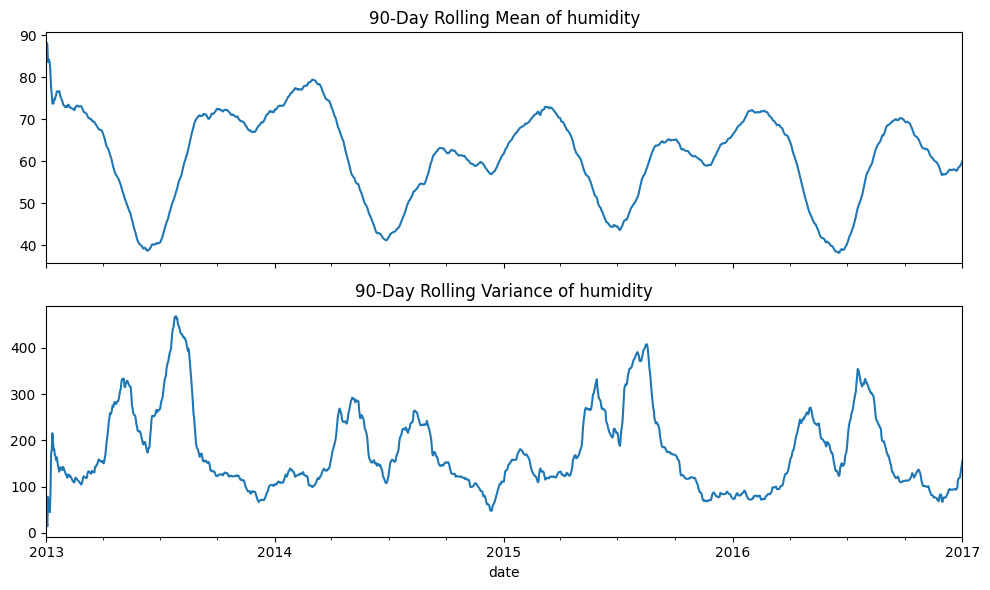

In [428]:
rolling_window("humidity")

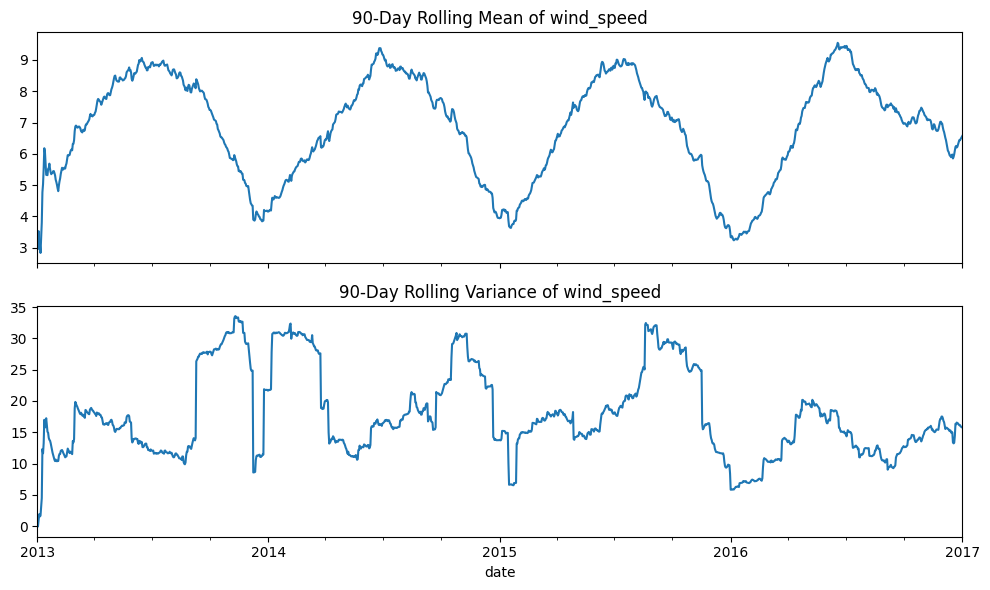

In [429]:
rolling_window("wind_speed")

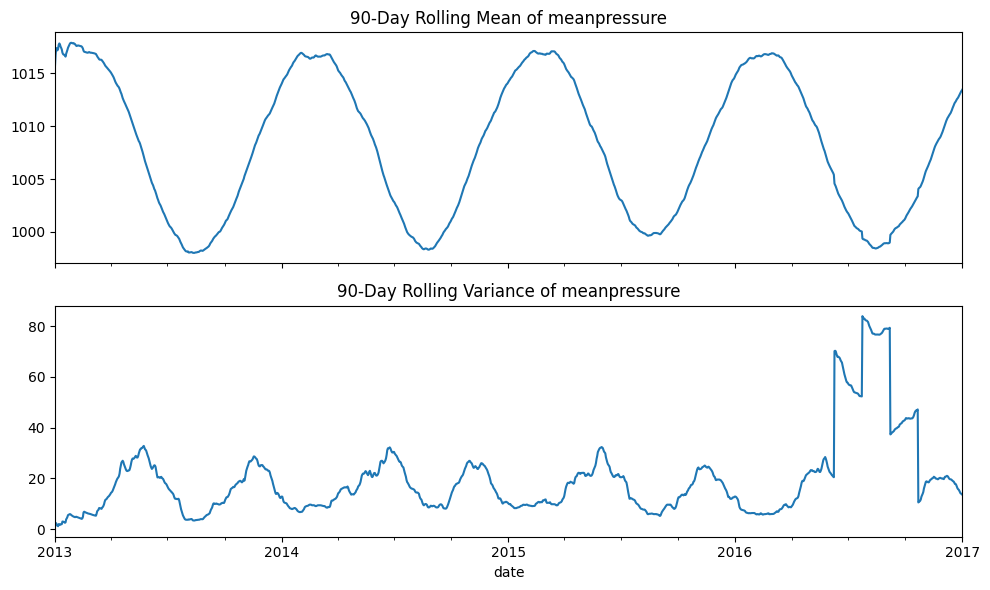

In [430]:
rolling_window("meanpressure")

D